In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

node = "All"  # Adjust as needed
unblankedfile = "summary_data/ALL_1336-9064_beam0000_unblanked"
filestem = "summary_data/ALL_1336-9064_beam00001"
filtered_bliss = "summary_data/ALL_1336-9064_beam0000_final"

print("**********************************")
print("Beginning quick node plotter for:", node + "/" + filestem + "/" + unblankedfile + "/" + filtered_bliss) 
print("**********************************")

# Read your unblanked bliss results file
unblanked_bliss_results = pd.read_csv(
    unblankedfile + ".dat",
    skiprows=9,
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

bliss_results = pd.read_csv(
    filestem + ".dat",
    skiprows=9,
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

final_bliss_results = pd.read_csv(
    filtered_bliss + ".dat",
    skiprows=9,
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

final_results = bliss_results[(bliss_results['Drift_Rate'] >= 0) & (bliss_results['Drift_Rate'] <= 1.5)]




**********************************
Beginning quick node plotter for: All/summary_data/ALL_1336-9064_beam00001/summary_data/ALL_1336-9064_beam0000_unblanked/summary_data/ALL_1336-9064_beam0000_final
**********************************


/var/folders/z0/kkt653vs1rscq9_7hh77yyyr0000gn/T/ipykernel_47325/3901914167.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  unblanked_bliss_results = pd.read_csv(
/var/folders/z0/kkt653vs1rscq9_7hh77yyyr0000gn/T/ipykernel_47325/3901914167.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  bliss_results = pd.read_csv(
/var/folders/z0/kkt653vs1rscq9_7hh77yyyr0000gn/T/ipykernel_47325/3901914167.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  final_bliss_results = pd.read_csv(


In [8]:
print(unblanked_bliss_results['Uncorrected_Frequency'])

0           6406.750588
1           6406.749394
2           6407.250601
3           6408.250594
4           6415.249394
               ...     
37015815    3676.249386
37015816    3680.249388
37015817    3684.750596
37015818    3686.994868
37015819    3687.711279
Name: Uncorrected_Frequency, Length: 37015820, dtype: float64


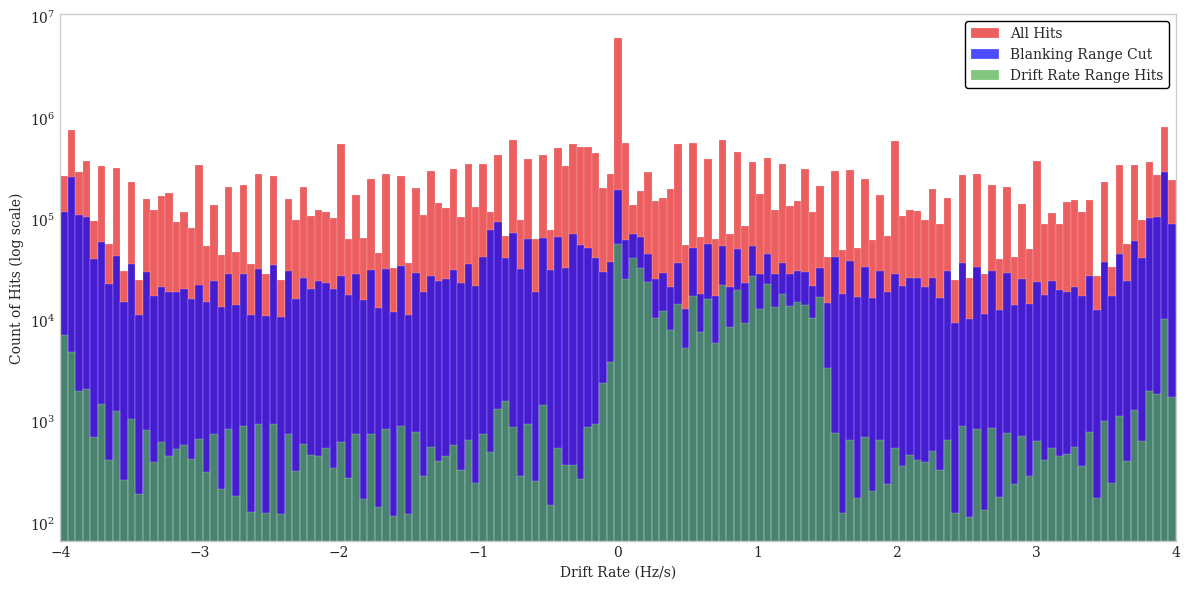

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 10,
    "legend.fontsize": 10
})

bin = np.linspace(-4, 4, 150)

plt.figure(figsize=(12, 6))

plt.hist(unblanked_bliss_results['Drift_Rate'], bins=bin, log=True,
         color='#e41a1c', alpha=0.7, label='All Hits', edgecolor='white', linewidth=0.2)

plt.hist(bliss_results['Drift_Rate'], bins=bin, log=True,
         color='blue', alpha=0.7, label='Blanking Range Cut', edgecolor='white', linewidth=0.2)

plt.hist(final_bliss_results['Drift_Rate'], bins=bin, log=True,
         color='#4daf4a', alpha=0.7, label='Drift Rate Range Hits', edgecolor='white', linewidth=0.2)



plt.xlim(-4, 4)
plt.xlabel('Drift Rate (Hz/s)')
plt.ylabel('Count of Hits (log scale)')

plt.legend(loc='upper right', frameon=True, framealpha=1, edgecolor='black')
plt.grid(False)
plt.tight_layout()
plt.show()

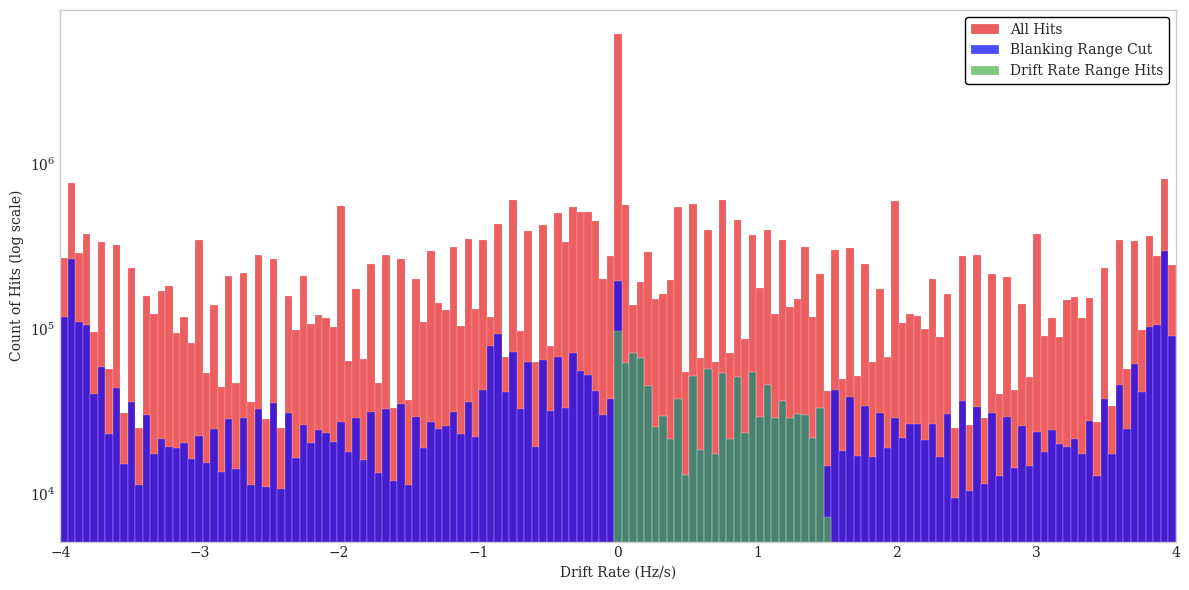

In [3]:
# Histogram of the Drift Rate

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 10,
    "legend.fontsize": 10
})

bin = np.linspace(-4, 4, 150)

plt.figure(figsize=(12, 6))

plt.hist(unblanked_bliss_results['Drift_Rate'], bins=bin, log=True,
         color='#e41a1c', alpha=0.7, label='All Hits', edgecolor='white', linewidth=0.2)

plt.hist(bliss_results['Drift_Rate'], bins=bin, log=True,
         color='blue', alpha=0.7, label='Blanking Range Cut', edgecolor='white', linewidth=0.2)

plt.hist(final_results['Drift_Rate'], bins=bin, log=True,
         color='#4daf4a', alpha=0.7, label='Drift Rate Range Hits', edgecolor='white', linewidth=0.2)



plt.xlim(-4, 4)
plt.xlabel('Drift Rate (Hz/s)')
plt.ylabel('Count of Hits (log scale)')

plt.legend(loc='upper right', frameon=True, framealpha=1, edgecolor='black')
plt.grid(False)
plt.tight_layout()
plt.show()


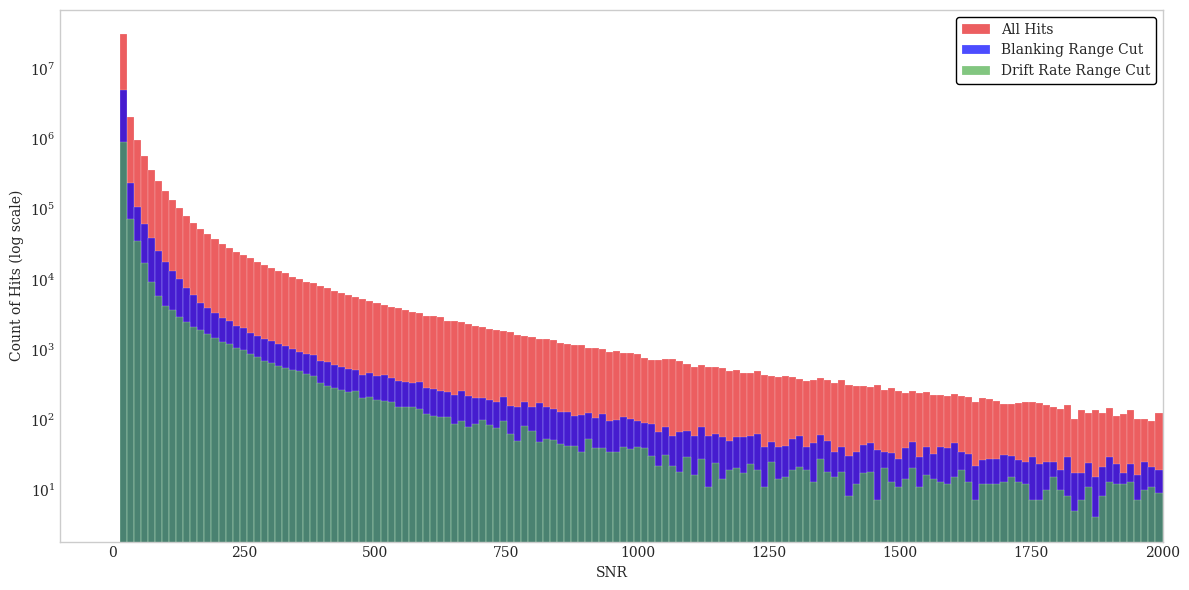

In [4]:
# Histogram of the SNR
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 10,
    "legend.fontsize": 10
})

bin = np.linspace(0, 2000, 150)

plt.figure(figsize=(12, 6))
plt.hist(unblanked_bliss_results['SNR'], log=True, bins=bin, color='#e41a1c', alpha=0.7, label='All Hits', edgecolor='white', linewidth=0.2)
plt.hist(bliss_results['SNR'], log=True, bins=bin, color='blue', alpha=0.7, label='Blanking Range Cut', edgecolor='white', linewidth=0.2)
plt.hist(final_results['SNR'], log=True, bins=bin, color='#4daf4a', alpha=0.7, label='Drift Rate Range Cut', edgecolor='white', linewidth=0.2)
plt.xlim(right=2000)
plt.xlabel('SNR')  
plt.ylabel('Count of Hits (log scale)')                     
#plt.title('Signal-to-Noise Ratio (SNR) from 1-9 MHz')

plt.legend(loc='upper right', frameon=True, framealpha=1, edgecolor='black')
plt.grid(False)
plt.tight_layout()
plt.show()